# 一、什么是Sparse Kernel Machines

在kernel method那篇博客中，我们介绍了很多算法都可以用kernel来表示。但是其中有一个限制就是我们计算kernel matrix的时候必须对每一对Xn，Xm都计算一遍 $k(x_n,x_m)$ ,其计算量是非常大的。所以有必要引入一种有着稀疏解的基于kernel的算法，在训练数据的`子集`上计算的kernel function即可，其对于新输入的预测仅仅依赖于稀疏kernel。而SVM就是Sparse Kernel Machines的一种。

> SVM 是一种决策机，并不提供后验概率



# 二、什么是 SVM

假设我们有一个线性可分的数据集，我们可以使用很多线性算法来进行分类，但是往往其决策边界并不是最优的。比如感知机算法，虽然能够保证在有限步骤内找到一组解，但是其绘制的决策边界不仅依赖于初始参数值的选择，也依赖于数据集中数据被处理的顺序。而SVM算法引入了边缘(margin)这个概念来使得我们可以得到最优的决策边界，所谓边缘是指任一数据点到决策边界的`最小距离`。SVM的核心思想就是最大化margin，也被戏称为最大化“路的宽度”。

> ‘路’的两侧边沿到决策边界的距离相等，都等于margin，决策边界位于‘路’的中间

<img src='image1.png'>

在上图的左、右两部分给出了两个不同的决策边界，但很明显左图的margin还并不是最大的，而右图给出了正确的决策边界。从图中我们可以看出，`margin最大化的决策边界，其“路”的边沿一定通过了部分数据点，而在‘路’的中间没有任何数据点`。

# 三、什么是支持向量

> 首先我们要理解所谓的向量是什么?

我们的数据集中的每一个数据点都处于一个特征空间当中，在这样的希尔伯特空间中，每一个点都可以用一个由空间原点指向该点的向量表示。因此支持向量机中的向量是指数据集中的数据点。

>什么样的向量才能被称为支持向量？

在上图的右侧图中给出的决策边界，其margin被最大化了，我们可以看到，其“路”的边沿是通过了若干个数据点的。也就是说，‘路’的边沿仅仅由这若干个数据点就可以决定，`这些能够确定决策边界的数据点被称为支持向量`。

当我们预测新的输入时，只用这些数据点来确定决策边缘，然后判断新的输入位于决策边界的哪一侧即可。这样，我们就不用使用到所有的数据点，所以支持向量机是文章开头所提到的sparse kernel machine的一种

# 四、支持向量机的理论解释


## 1. 我们要考虑的简单模型

首先我们考虑这样一个二类分类问题，我们使用如下所示的线性模型：

$$y(x)=w^Tx+b$$

不过我们也可以引入一个固定的特征空间映射，使得训练数据集在特征空间中是可分的，我们默认采用如下模型：

$$y(x)=w^T\phi (x)+b$$

训练数据中有N个输入向量 $X_1,...,X_N$ ,对应的target value为 $t_1,...,t_N$, $t_j \in \{-1,1\}$。

新的输入x根据y(x)的符号（正负）来分类。也就是说，在决策边界上,$$y(x)=w^Tx+b=0$$

对于训练数据中所有 $t_n=+1$ 的数据点， $y(X_n)>0$ ,对于所有 $t_n=-1$ 的数据点， $y(X_n)<0$。
这样可以得到:

$$t_ny(X_n)>0$$

但是这仅仅是一个很宽松的条件，仅仅考虑了决策边界。但是SVM的目标是使得margin最大化，同时决策边界到“路”的两侧边沿的距离是相等的，所以我们可以规定:

* 对于在'路'的边沿上的数据点

$$t_n(w^T\phi (X_n)+b)=1$$

* 对于不在'路'的边沿上的数据点

$$t_n(w^T\phi (X_n)+b)>1$$

* 对于训练数据中所有的点满足

$$t_n(w^T\phi (X_n)+b)\geq 1$$

`这是我们要用到的第一个约束条件`

## 2.如何计算'路'的宽度

SVM的思想就是最大化‘路’的宽度。那么'路'的宽度在我们的上述模型中如何定量得到呢？

> 在特征空间中，决策边界是与参数W相互垂直的

<img src='image2.png'>

在上图中，假设有两个支持向量，分别用 $X_+$ , $X_-$ 表示，从 $X_-$ 指向 $X_+$ 的向量记作 $\tilde{x}=(X_+ - X_ -)$ ,还有一个与W同方向的单位向$\tilde{u}=\frac{w}{\vert w \vert}$ ，那么’路‘的宽度等于$\tilde{x}$在$\tilde{u}$方向上的投影，即两者的内积:

$$width=\tilde{x}\tilde{u} = (X_+ - X_-)\frac{w}{\vert w \vert}$$

这时由我们在上面提到的第一个约束条件我们知道， （注意这里为了表达的方便并没有使用特征映射函数$\phi(x)$）

$$
w^TX_+ + b=+1\\
w^TX_- + b=-1 \\
\Rightarrow (X_+ - X_-)w=2
$$

所以我们得到了'路'的宽度为：

$$width=\frac{2}{\vert w \vert}$$

## 3.如何让‘路’的宽度最大化

我们已经得到了“路”的宽度的表达式，要想让路得宽度最大化，那么等价于让$\vert w \vert$最小化，等价于让$\frac{1}{2}\vert w \vert ^2$最小化。

同时我们还有一个约束条件，对于N个数据点，有：
$$t_n(w^T\phi (X_n)+b)\geq 1$$

利用拉格朗日乘数法，有

$$L(w,b,\mathbf{a})=\frac{1}{2}\vert w \vert ^2 - \sum_{n=1}^{N} a_n \{ t_n (w^T\phi (X_n)+b)-1\}$$

$a_j$为拉格朗日乘数，$\mathbf{a}=(a_1,...,a_N)^T$。需要注意的是，$a_j\geq 0$，为了使得 $\frac{1}{2}w^2$ 最小化，我们在拉格朗日乘数部分前面加上的是负号。

根据拉格朗日乘数法，对W和b求导并令其导数为0，有：

$$
\mathbf{w}=\sum_{n=1}^{N} a_n t_n \phi(X_n)\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$

将上式代回到$L(\mathbf{w},b,\mathbf{a})$中有：

$$
\tilde{L}(\mathbf{a})=\frac{1}{2}\sum_{n=1}^{N} a_n t_n \phi(X_n) \sum_{n=1}^{N} a_n t_n \phi(X_n) - \sum_{n=1}^{N} a_n t_n \phi(X_n) \sum_{n=1}^{N} a_n t_n \phi(X_n) - \sum_{n=1}^{N} a_n t_n b + \sum_{n=1}^{N}a_n \\
\\
\Rightarrow \\
\\
\tilde{L}(\mathbf{a})=\sum_{n=1}^{N}a_n - \frac{1}{2}\sum_{n=1}^{N} a_n t_n \phi(X_n) \sum_{n=1}^{N} a_n t_n \phi(X_n)\\
\\
\Rightarrow \\
\\
\tilde{L}(\mathbf{a})=\sum_{n=1}^{N}a_n - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}a_n a_m t_n t_m k(X_n,X_m)
$$

上式需要满足如下两个条件：

$$
a_n \geq 0 , n=1,...N\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$

> 至此我们已经将$L(\mathbf{w},b,\mathbf{a})$最小化的问题转变为了使得$L(\mathbf{a})$最大化的问题

因为在

$$L(w,b,\mathbf{a})=\frac{1}{2}\vert w \vert ^2 - \sum_{n=1}^{N} a_n \{ t_n (w^T\phi (X_n)+b)-1\}$$

中，要使得L最大，需要使得$a_n$最大，而新的L(a)中当$a_n$最大时，L(a)最大。所以我们把原来的$L(\mathbf{w},b,\mathbf{a})$最小化的问题转变为了使得$L(\mathbf{a})$最大化的问题

##  4.拉格朗日函数的对称表示

我们将'路的宽度'最大化问题转化成为了使得如下拉格朗日函数最大化的问题：

$$\tilde{L}(\mathbf{a})=\sum_{n=1}^{N}a_n - \frac{1}{2}\sum_{n=1}^{N} a_n t_n \phi(X_n) \sum_{n=1}^{N} a_n t_n \phi(X_n)$$

约束条件为：

$$
a_n \geq 0 , n=1,...N\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$

对于$\sum_{n=1}^{N} a_n t_n \phi(X_n)$，我们可以改写为：

$$\sum_{n=1}^{N} a_n t_n \phi(X_n)=\begin{bmatrix}\phi (X_1),\cdots , \phi (X_N) \end{bmatrix}\begin{bmatrix} y_1a_1 \\
\vdots 
y_na_n\end{bmatrix}\\
=\begin{bmatrix}\phi (X_1),\cdots , \phi (X_N) \end{bmatrix}\begin{bmatrix}t_1 \cdots  0 \\
 \ddots  \\
0 \cdots t_n\end{bmatrix}
\begin{bmatrix} a_1 \\ \vdots \\ a_N\end{bmatrix}\\
=\Phi ^T \mathbf{t} \mathbf{a}
$$

$$\sum_{n=1}^{N} a_n t_n \phi(X_n) \sum_{n=1}^{N} a_n t_n \phi(X_n)=(\Phi ^T \mathbf{t} \mathbf{a})^T(\Phi ^T \mathbf{t} \mathbf{a})=\mathbf{a}^T \mathbf{t} \Phi \Phi ^T \mathbf{t} \mathbf{a}=\mathbf{a}^T \mathbf{t} \mathbf{K} \mathbf{t} \mathbf{a}$$

所以原拉格朗日函数变为：

$$\tilde{L}(\mathbf{a})=\mathbf{1}^T\mathbf{a}-\frac{1}{2}\mathbf{a}^T \mathbf{t} \mathbf{K} \mathbf{t} \mathbf{a}$$


约束条件为：

$$
a_n \geq 0 , n=1,...N\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$


## 5.二次规划问题的求解


那么如何找到能使得L(a)最大的$\mathbf{a}$呢?

`这是一个二次规划问题(quardratic programming),属于数值优化的一种`

在SVM中常见的有如下这三种方法：

* QP  二次规划解法，可以保证找到最优解

* SMO sequential minimal optimization   不一定每一次都能解出

* LS least Squares 

由于这一部分属于数值优化的部分，一般是使用他人优化的很好的代码即可，只要找到我们需要的$\mathbf{a}$

## 6. 如何求解 $\mathbf{w}$和b

在我们通过二次规划求解出来 $、mathbf{a}$ 之后，我们就可以通过 $\mathbf{a}$来计算得到 $\mathbf{w}$和b，从而得到决策边界

在上面3中，拉格朗日求导部分我们已经得到：

$$\mathbf{w}=\sum_{n=1}^{N} a_n t_n \phi(X_n)=\Phi ^T \mathbf{t} \mathbf{a}$$


对于上面的最优化问题，我们可以得到如下的KKT条件：

$$
a_n \geq 0\\
t_ny(X_n)-1 \geq 0 \\
a_n \{t_ny(X_n)-1 \} =0
$$

对于训练数据中的每一个数据点，要么 $a_n=0$,要么 $t_ny(X_n)=1$。

如果$a_n=0$,那么该样本点就不会出现在下式中，：

$$y(x)=\sum_{n=1}^{N}a_n t_n k(x,X_n)+b$$

只有 $t_ny(X_n)=1$ 的时候才会出现在上式中，因此这些点才被称为支持向量。

利用这些支持向量，我们可以计算出b的值，考虑到$t_ny(X_n)=1$ 有：

$$t_n\left( \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m)+b \right)=1$$

又因$t_n \in \{-1,1\}$,所以$t_n ^2=1$,那么将上式左右乘以$t_n$有：

$$b=t_n- \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m) $$

但是这里只使用了一个$t_n$,我们可以使用所有的支持向量并求平均：

$$b=\frac{1}{N_s}\sum_{n \in \mathbf{s}} \left(t_n- \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m) \right)$$

# 六、如何实现一个非线性的SVM

下面这段代码给出了一个非线性SVM的实例，
相关数据下载:


In [2]:
%matplotlib inline

import numpy as np
from scipy.linalg import norm
import cvxopt
import cvxopt.solvers
from pylab import *

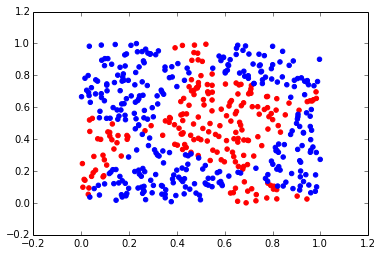

In [8]:
data=np.loadtxt('data.txt')

# 获得训练数据
X = data[:,0:2]
t=data[:,2]
t = 2*t-3  # 将类别由1，2 转换成为-1，1

indexOfClass1=t==-1

indexOfClass2=t==1

scatter(X[indexOfClass1,0],X[indexOfClass1,1],color='r')
scatter(X[indexOfClass2,0],X[indexOfClass2,1],color='b')

     pcost       dcost       gap    pres   dres
 0: -1.1382e+02 -2.9664e+02  1e+03  3e+01  2e+00
 1: -2.7149e+02 -4.4529e+02  7e+02  1e+01  1e+00
 2: -4.5378e+02 -6.4589e+02  7e+02  1e+01  1e+00
 3: -1.4698e+03 -1.7091e+03  8e+02  1e+01  9e-01
 4: -1.7329e+03 -2.0083e+03  9e+02  1e+01  9e-01
 5: -2.6332e+03 -3.0732e+03  1e+03  9e+00  7e-01
 6: -3.3675e+03 -3.8939e+03  1e+03  5e+00  4e-01
 7: -3.2772e+03 -3.5691e+03  5e+02  1e+00  1e-01
 8: -3.3061e+03 -3.3833e+03  1e+02  3e-01  2e-02
 9: -3.3118e+03 -3.3171e+03  6e+00  3e-03  2e-04
10: -3.3160e+03 -3.3161e+03  9e-02  2e-05  2e-06
11: -3.3160e+03 -3.3160e+03  2e-03  3e-07  2e-08
12: -3.3160e+03 -3.3160e+03  6e-05  3e-09  2e-10
Optimal solution found.
[33, 61, 62, 66, 90, 91, 93, 94, 95, 105, 121, 131, 138, 152, 160, 165, 172, 202, 206, 211, 215, 216, 233, 243, 249, 254, 334, 352, 366, 367, 370, 390, 407, 421, 423, 446, 456, 459, 461, 474, 489, 495, 497] -0.169196107517


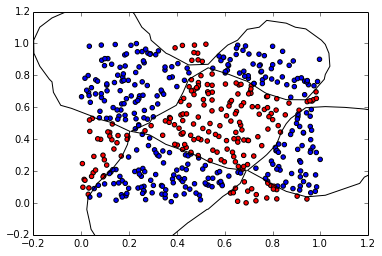

In [9]:
"""
非线性SVM

使用了cvxopt中的Quadratic Programming，要先安装cvxopt：sudo -H pip install cvxopt
"""

N = len(X)         #训练数据的个数
P = 3           # 多项式核的阶数
SIGMA = 0.125     # RBF kernel 中的sigma数，至于为什么将sigma设定为0.125就涉及到另外一个话题，参数寻找，可以查看我的其他博客

# 多项式 kernel
def polynomial_kernel(x, y):
    return (1 + np.dot(x, y)) ** P

# RBF kernel
def gaussian_kernel(x, y):
    return np.exp(- norm(x-y)**2 / (2 * (SIGMA ** 2)))

# 选定RBF kenel
kernel = gaussian_kernel

# 对于新的输入x求y(x)
def f(x, a, t, X, b):
    summation = 0.0
    for n in range(N):
        summation += a[n] * t[n] * kernel(x, X[n])
    return summation + b



# 计算gram matrix 注意这里根据 L(a)的公式部分将t_nt_jK(X_n,X_m)直接写在了一起
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = t[i] * t[j] * kernel(X[i], X[j])

        
#属于数值优化部分，不详解，请参考相关文档
Q = cvxopt.matrix(K)
p = cvxopt.matrix(-np.ones(N))
G = cvxopt.matrix(np.diag([-1.0] * N))
h = cvxopt.matrix(np.zeros(N))
A = cvxopt.matrix(t, (1, N))
b = cvxopt.matrix(0.0)
sol = cvxopt.solvers.qp(Q, p, G, h, A, b)
a = array(sol['x']).reshape(N)

# 找到支持向量，对于支持向量而言，a_n 不等于0
S = []
for n in range(len(a)):
    if a[n] < 1e-5: continue
    S.append(n)

# 计算b
summation = 0
for n in S:
    temp = 0
    for m in S:
        temp += a[m] * t[m] * kernel(X[n], X[m])
    summation += (t[n] - temp)
b = summation / len(S)

print S, b

# 绘制训练数据
for n in range(N):
    if t[n] > 0:
        scatter(X[n,0], X[n,1], c='b', marker='o')
    else:
        scatter(X[n,0], X[n,1], c='r', marker='o')



# 绘制决策边界
X1, X2 = meshgrid(linspace(-2,2,50), linspace(-2,2,50))
w, h = X1.shape
X1.resize(X1.size)
X2.resize(X2.size)
Z = array([f(array([x1, x2]), a, t, X, b) for (x1, x2) in zip(X1, X2)])
X1.resize((w, h))
X2.resize((w, h))
Z.resize((w, h))
CS = contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')

xlim(-0.2, 1.2)
ylim(-0.2, 1.2)
show()